In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/workspaces/Practise-Code/Kaggle Project/Data/Cleaned Data/df_cleaned.csv')

df.rename(columns={'date': 'date'}, inplace=True)

df['date'] = pd.to_datetime(df['date'])

df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,...,id,date,yr_renovated,zipcode,lat,long,view,waterfront,month,decade_built
0,0,993000.0,4,2.00,2850,14810,2.0,5,8,2490,...,824059083,2014-09-02,0,98004,47.5892,-122.203,0,0,9,1950
1,1,991700.0,4,3.00,2290,2350,2.0,3,9,1610,...,375000165,2014-07-23,2011,98116,47.5740,-122.415,1,0,7,1920
2,2,990400.0,3,2.50,2100,4097,2.0,3,9,2100,...,524059323,2015-02-19,0,98004,47.5983,-122.200,0,0,2,2000
3,3,990000.0,3,2.75,2500,6350,2.0,5,9,2370,...,9829200580,2014-09-17,0,98122,47.6035,-122.285,0,0,9,1970
4,4,990000.0,4,3.75,3450,4940,2.0,3,10,2570,...,3047700105,2015-04-23,0,98103,47.6920,-122.338,0,0,4,2000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16375 entries, 0 to 16374
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     16375 non-null  int64         
 1   price          16375 non-null  float64       
 2   bedrooms       16375 non-null  int64         
 3   bathrooms      16375 non-null  float64       
 4   sqft_living    16375 non-null  int64         
 5   sqft_lot       16375 non-null  int64         
 6   floors         16375 non-null  float64       
 7   condition      16375 non-null  int64         
 8   grade          16375 non-null  int64         
 9   sqft_above     16375 non-null  int64         
 10  sqft_basement  16375 non-null  int64         
 11  yr_built       16375 non-null  int64         
 12  sqft_living15  16375 non-null  int64         
 13  sqft_lot15     16375 non-null  int64         
 14  id             16375 non-null  int64         
 15  date           1637

In [4]:
df.describe()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,...,id,date,yr_renovated,zipcode,lat,long,view,waterfront,month,decade_built
count,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,...,1.637500e+04,16375,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000
mean,8187.000000,442472.321405,3.222595,1.960412,1795.179176,6874.934473,1.462809,3.410565,7.372031,1563.901313,...,4.764787e+09,2014-10-29 23:51:38.748091648,67.134534,98082.491359,47.559051,-122.231877,0.120794,0.001038,6.577527,1964.748092
min,0.000000,82000.000000,1.000000,0.500000,370.000000,520.000000,1.000000,2.000000,5.000000,370.000000,...,2.800031e+06,2014-05-02 00:00:00,0.000000,98001.000000,47.155900,-122.475000,0.000000,0.000000,1.000000,1900.000000
25%,4093.500000,300000.000000,3.000000,1.500000,1330.000000,4662.500000,1.000000,3.000000,7.000000,1130.000000,...,2.325400e+09,2014-07-23 00:00:00,0.000000,98034.000000,47.468300,-122.339000,0.000000,0.000000,4.000000,1940.000000
50%,8187.000000,410500.000000,3.000000,2.000000,1730.000000,6947.000000,1.000000,3.000000,7.000000,1420.000000,...,4.077800e+09,2014-10-17 00:00:00,0.000000,98074.000000,47.568300,-122.273000,0.000000,0.000000,6.000000,1970.000000
75%,12280.500000,554839.500000,4.000000,2.500000,2200.000000,8841.500000,2.000000,4.000000,8.000000,1890.000000,...,7.518505e+09,2015-02-18 00:00:00,0.000000,98119.000000,47.681000,-122.156000,0.000000,0.000000,9.000000,1990.000000
max,16374.000000,993000.000000,5.000000,3.750000,3620.000000,16575.000000,3.000000,5.000000,10.000000,3340.000000,...,9.900000e+09,2015-05-24 00:00:00,2015.000000,98199.000000,47.777600,-121.315000,4.000000,1.000000,12.000000,2010.000000
std,4727.199664,180931.210577,0.795187,0.654022,604.077199,3171.778391,0.543955,0.643520,0.878318,588.009201,...,2.871255e+09,NaN,359.797206,53.885474,0.139565,0.131808,0.523951,0.032205,3.120707,30.042045


In [30]:
corr_matrix = df.corr()

price_correlations = corr_matrix['price'].sort_values(ascending=False)
print(price_correlations)

price            1.000000
grade            0.546066
sqft_living      0.521301
lat              0.483746
sqft_living15    0.456696
sqft_above       0.406218
bathrooms        0.357516
floors           0.236486
bedrooms         0.235952
sqft_basement    0.217849
view             0.206887
yr_renovated     0.095674
condition        0.060390
waterfront       0.043847
id               0.041868
zipcode          0.026114
date            -0.003798
long            -0.008057
month           -0.015259
decade_built    -0.028336
yr_built        -0.030336
sqft_lot        -0.083716
sqft_lot15      -0.096094
Unnamed: 0      -0.969135
Name: price, dtype: float64


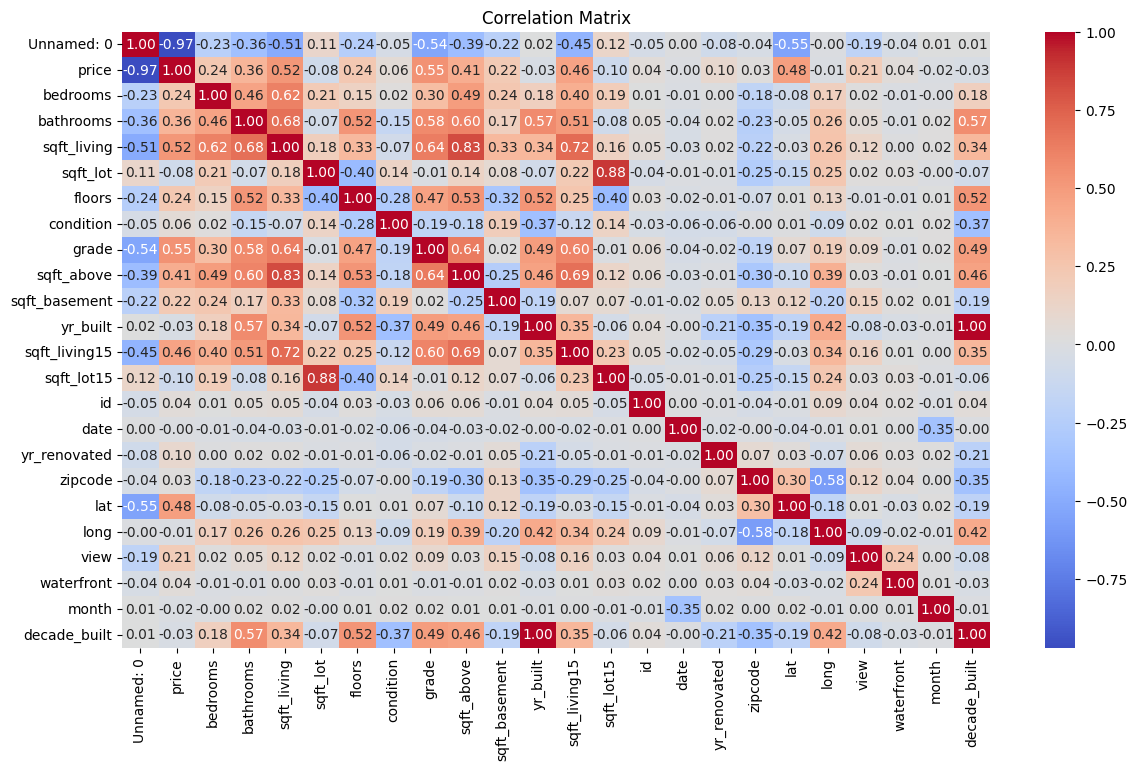

In [34]:
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

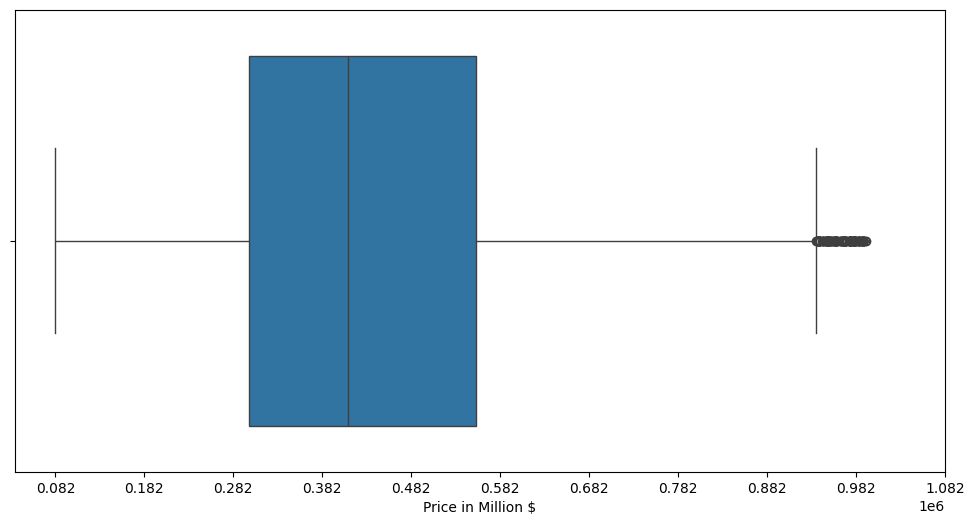

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.boxplot(x=df['price'])

plt.xlabel('Price in Million $')

plt.xticks(ticks=range(int(df['price'].min()), int(df['price'].max()) + 100000, 100000))

plt.show()




**Summary of Price Data**

- Most of the prices in the data are on the lower end, with a few higher prices pulling the average up.
- The middle 50% of the data is closer to the lower prices.
- There's a bigger gap between the median price and the higher prices than between the median and the lower prices.
- All the prices are below one million dollars because any extremely high values were removed during data cleaning.

